# Laplace Transform 

Inspired by a project done by [John Tapsell](https://johnflux.com/2019/02/12/laplace-transform-visualized/). First I start with a function $f(t)$, transform it into a complex valued function $F(s)$, and then use an approximation to convert it back to the time domain.
 
Consider the following function  

<body><center> $f(t) = e^{t}\cos{(2\pi t)}$ </center></body>

By definition, the Laplace transform is as follows where $s = \sigma + i \omega$. <br><br>

<body><center> $\mathcal{L}\{f(t)\} = \int_{0}^{\infty}f(t)e^{-st}dt $ </center></body>



Integrating our defined function $f(t)$ <br><br>

$$ \begin{align*}
        \begin{split}
        \mathcal{L}\{f(t)\} & = \int_{0}^{\infty}e^{t}\cos{(2\pi t)}e^{-st}dt \\
        & = \int_{0}^{\infty}e^{-(s-1)t}\cos{(2\pi t)}dt \\
           & = \lim_{A\to\infty}\bigg[\frac{1}{2\pi}e^{-(s-1)t}sin(2\pi t) \Big|_0^A\bigg] + \frac{s-1}{2\pi}\int_{0}^{\infty}e^{-(s-1)t}sin(2\pi t)dt \\
            & =  \frac{s-1}{2\pi}\bigg(\lim_{A\to\infty}\bigg[-\frac{1}{2\pi}e^{-(s-1)t}cos(2\pi t) \Big|_0^A\bigg] - \frac{s-1}{2\pi}\int_{0}^{\infty}e^{-(s-1)t}cos(2\pi t)dt\bigg) \\
             & =  \frac{s-1}{2\pi}\bigg(\frac{1}{2\pi} - \frac{s-1}{2\pi}\int_{0}^{\infty}e^{-(s-1)t}cos(2\pi t)dt\bigg) \\
             & = \frac{s-1}{(2\pi)^2} - \frac{(s-1)^2}{(2\pi)^2}\int_{0}^{\infty}e^{-(s-1)t}cos(2\pi t) \\
              \bigg(\frac{(s-1)^2}{(2\pi)^2} + 1 \bigg)\mathcal{L}\{f(t)\} & = \frac{s-1}{(2\pi)^2} \\
             F(s) & = \frac{s-1}{(s-1)^2+(2\pi)^2}
        \end{split}
\end{align*}
$$

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
plt.rcParams.update({'font.size': 10})

In [2]:
# Given functions

def f_(t):
    return np.exp(t)*np.cos(2*np.pi*t)

def F_(s):
    return (s-1)/((s-1)**2+(4*np.pi**2))

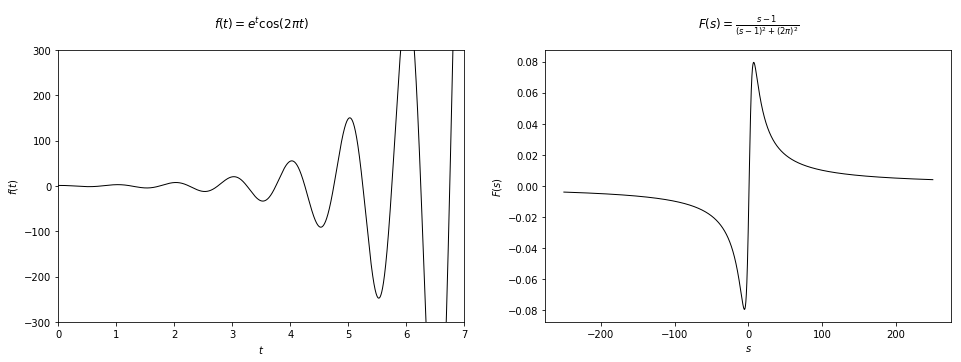

In [3]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (16,5))

# time domain
t = np.linspace(0, 7, 10000)
f_t = f_(t)
ax1.plot(t, f_t, c = 'k', linewidth = 1)
ax1.set_title(r'$f(t) = e^{t}\cos{(2\pi t)}$'+'\n')
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$f(t)$')
ax1.set_xlim([0,7])
ax1.set_ylim([-300, 300])

# frequency domain
s = np.linspace(-250, 250, 10000)
F_s = F_(s)
ax2.plot(s, F_s, c = 'k', linewidth = 1)
ax2.set_title(r'$F(s) = \frac{s-1}{(s-1)^2+(2\pi)^2}$'+'\n')
ax2.set_xlabel(r'$s$')
ax2.set_ylabel(r'$F(s)$')
plt.show()

Take the inverse Laplace Transform to get back our original function.


$$ \begin{align*}
        \begin{split}
            f(t) = \mathcal{L}^{-1}\{F(s)\}(t) & = \frac{1}{2\pi i}\lim_{T\to\infty}\int_{\gamma-iT}^{\gamma+iT}e^{st}F(s)ds
        \end{split}
\end{align*}
$$

Relying on [John Tapsell's](https://johnflux.com/2019/02/12/laplace-transform-visualized/) notes, we make the substitution $s=\sigma + i \omega$ and $\frac{ds}{dr} = i$.


$$ \begin{align*}
        \begin{split}
            f(t) = \mathcal{L}^{-1}\{F(s)\}(t) & = \frac{1}{2\pi i}\int_{-\infty}^{\infty}ie^{(\sigma + i \omega)t}F(\sigma + i \omega)d\omega \\
            & = \frac{1}{2\pi}\int_{-\infty}^{\infty}e^{(\sigma + i \omega)t}F(\sigma + i \omega)d\omega \\
            & \approx \frac{1}{2\pi}\sum_{i=-n}^{n}e^{(\sigma + i \omega)t}F(\sigma + i \omega) \Delta_{d\omega}
        \end{split}
\end{align*}
$$

In [4]:
def LT_invert_(func, b, t):
    s = (2 + b*1j)
    e = (1/(2*np.pi))*np.exp(s*t)
    return (func(s)*e).real

n_frames = 1500
sigma_ = np.zeros(10000) # approaches f(t) as |n| -> inf
prev_w = 0
delta = .05

In [5]:
fig = plt.figure(figsize = (14,7))
ax = plt.axes(xlim=(0,7), ylim=(-300, 300))
line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)

# intializing lines
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2,

def animate(i):
    global sigma_, delta, prev_w, t
    w_positive = prev_w + delta
    w_negative = -(w_positive)
     
    # starting with a small interval, 
    # y1 and y2 grow in magnitude to form a longer sum of F(s)*e^st
    y1 = LT_invert_(F_, w_positive, t) # positive 
    y2 = LT_invert_(F_, w_negative, t) # negative
    sigma_ += (y1+y2)*delta
    prev_w = w_positive
    
    line1.set_data(t, y1,)
    line2.set_data(t, sigma_,)
    return line1, line2

# changing properties of lines 
line1.set_color('r')
line1.set_alpha(.5)
line1.set_linewidth(1)
line2.set_color('g')
line2.set_linewidth(1)

# plotting f(t) and running animation
plt.plot(t, f_t, color = 'k', linewidth = 1)
plt.xlabel(r'$t$')
plt.ylabel(r'$f(t)$')
plt.title(r'Inverse Laplace Transform of $f(t) = e^{t}\cos{(2\pi t)}$'+'\n')
plt.legend(['Frequency', 'Tot. Sum of Freqs.', r'$f(t)$'], prop={'size':8})

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=n_frames, interval=20, blit=True)
HTML(anim.to_html5_video()) # This lets you animate within ipynb 

#anim.save('animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
#plt.show()